# Workshop Task - Training models and basic preprocessing in Scikit-Learn


You have the following dataset :
A high rate of default is undesirable for a bank, because it means that the bank is unlikely to fully recover its investment. If we are successful, our model will identify applicants that are at high risk to default, allowing the bank to refuse credit requests

**Taraget class**  
  default                
      - 1 = no           
      - 2 = yes

**Features**
* months_loan_duration   - Loan duration in months
* amount                 - Loan amount
* installment_rate       - Monthly Rate
* residence_history      - Residence history – length of time living at current location
* age                    - Client age
* existing_credits       - Number of Existing lines of credit with the bank
* dependents             - Number of loan dependents


* checking_balance      - Checking balance, savings balance amounts
* credit_history        -  represents if loan is delayed, ‘fully repaid’, critical etc
* purpose               -  Purpose of loan
* savings_balance       -  savings balance amounts
* employment_length     -  0-1 years, 1-4 years, 4-7, >7 years, unemployed
* personal_status       - relationship status
* other_debtors         - other debts activities
* property              - type of owned property
* installment_plan       -  method of paying
* housing                -  does he live for free, owns or is living on rental
* telephone              - owner of telephone
* foreign_worker         - Is the client from other country 
* job                    - job skill


**Missing values :  Annotated with 'unknown'**  

Your task is to : 

* Preprocess the data 
* Make train/test split : with train(70%), test(30%).  
  Use - train_test_split(X, y, test_size=0.30, random_state=0)
* Train the model
* Evaluate the model
* Achieve accuracy on test set >=0.76
* For reproducibility please use random_state on train_test_split and model initialization
* Write a summary :
    - Which model gives the best result?
    - Which model can be interpreted most easily for a client?
    - What can we improve in the future?
    
Bonus points : 
* Add precision/recall evaluation


# 1.Import 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from scipy.stats import skew, kurtosis
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import Normalizer, LabelEncoder
from xgboost import plot_importance

# 2.Read dataset

In [2]:
dataset = pd.read_csv('credit.csv')

In [3]:
dataset.head(10)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee
5,unknown,36,repaid,education,9055,unknown,1 - 4 yrs,2,single male,none,...,unknown/none,35,none,for free,1,1,2,yes,yes,unskilled resident
6,unknown,24,repaid,furniture,2835,501 - 1000 DM,> 7 yrs,3,single male,none,...,building society savings,53,none,own,1,1,1,none,yes,skilled employee
7,1 - 200 DM,36,repaid,car (used),6948,< 100 DM,1 - 4 yrs,2,single male,none,...,other,35,none,rent,1,1,1,yes,yes,mangement self-employed
8,unknown,12,repaid,radio/tv,3059,> 1000 DM,4 - 7 yrs,2,divorced male,none,...,real estate,61,none,own,1,1,1,none,yes,unskilled resident
9,1 - 200 DM,30,critical,car (new),5234,< 100 DM,unemployed,4,married male,none,...,other,28,none,own,2,2,1,none,yes,mangement self-employed


In [4]:
# Data shape
print('data:',dataset.shape)

data: (1000, 21)


In [5]:
# how many 'unknown' strings we have in the dataset
dataset.apply(lambda row: row.astype(str).str.contains('unknown').sum(), axis=0)

checking_balance        394
months_loan_duration      0
credit_history            0
purpose                   0
amount                    0
savings_balance         183
employment_length         0
installment_rate          0
personal_status           0
other_debtors             0
residence_history         0
property                154
age                       0
installment_plan          0
housing                   0
existing_credits          0
default                   0
dependents                0
telephone                 0
foreign_worker            0
job                       0
dtype: int64

In [6]:
#replace 'unknown' with Nan =>for now, I would leave 'unknown' as they are, because I want to analyze why possibly this info is not provided
#dataset.replace({'unknown': np.nan}, inplace = True)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_length     1000 non-null   object
 7   installment_rate      1000 non-null   int64 
 8   personal_status       1000 non-null   object
 9   other_debtors         1000 non-null   object
 10  residence_history     1000 non-null   int64 
 11  property              1000 non-null   object
 12  age                   1000 non-null   int64 
 13  installment_plan      1000 non-null   object
 14  housing               1000 non-null   object
 15  existing_credits      1000 non-null   i

Almost 40% and 18% of the checking and saving balance respectively for the loan clients is missing. For now, I will leave it, as they need further analysis, before decide what to do with these features.

# 3. Info about dataset

In [11]:
df2 = dataset.apply(lambda col: col.value_counts().index.tolist())

print(df2)

checking_balance                  [unknown, < 0 DM, 1 - 200 DM, > 200 DM]
months_loan_duration    [24, 12, 18, 36, 6, 15, 9, 48, 30, 21, 10, 60,...
credit_history          [repaid, critical, delayed, fully repaid this ...
purpose                 [radio/tv, car (new), furniture, car (used), b...
amount                  [1478, 1262, 1258, 1275, 1393, 1442, 3590, 257...
savings_balance         [< 100 DM, unknown, 101 - 500 DM, 501 - 1000 D...
employment_length       [1 - 4 yrs, > 7 yrs, 4 - 7 yrs, 0 - 1 yrs, une...
installment_rate                                             [4, 2, 3, 1]
personal_status         [single male, female, married male, divorced m...
other_debtors                             [none, guarantor, co-applicant]
residence_history                                            [4, 2, 3, 1]
property                [other, real estate, building society savings,...
age                     [27, 26, 23, 24, 28, 25, 30, 35, 36, 31, 29, 3...
installment_plan                      

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_length     1000 non-null   object
 7   installment_rate      1000 non-null   int64 
 8   personal_status       1000 non-null   object
 9   other_debtors         1000 non-null   object
 10  residence_history     1000 non-null   int64 
 11  property              1000 non-null   object
 12  age                   1000 non-null   int64 
 13  installment_plan      1000 non-null   object
 14  housing               1000 non-null   object
 15  existing_credits      1000 non-null   i

In [13]:
for column in dataset:
    if dataset[column].dtype == 'object':
        print(column)

checking_balance
credit_history
purpose
savings_balance
employment_length
personal_status
other_debtors
property
installment_plan
housing
telephone
foreign_worker
job


In [14]:
dataset.dtypes.unique()

array([dtype('O'), dtype('int64')], dtype=object)

In [15]:
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

cat_columns = []
num_columns = []
print("Numeric columns:")
for column in dataset.columns:
    if is_numeric_dtype(dataset[column]):
        num_columns.append(column)
        print(column)
print("----------------------------------")        
print("Category columns:")        
for column in dataset.columns:
    if is_string_dtype(dataset[column]):
        cat_columns.append(column)
        print(column)

Numeric columns:
months_loan_duration
amount
installment_rate
residence_history
age
existing_credits
default
dependents
----------------------------------
Category columns:
checking_balance
credit_history
purpose
savings_balance
employment_length
personal_status
other_debtors
property
installment_plan
housing
telephone
foreign_worker
job


In [16]:
num_df = dataset[num_columns] #dataframe with numerical features
cat_df = dataset[cat_columns] #dataframe with categorical features

### **Target Variable**
'default' is our target as that is the dependent variable we are trying to predict.

In [17]:
dataset['default'].replace({1: 'no', 2: 'yes'}, inplace=True)

Target Variable
default
no     700
yes    300
Name: default, dtype: int64


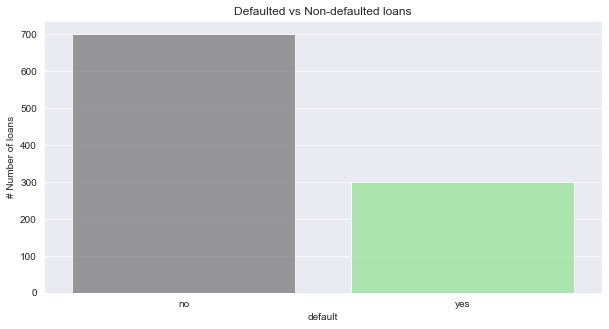

In [18]:
# Survival Count
print('Target Variable')
print(dataset.groupby(['default']).default.count())

# Target Variable Countplot
sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
sns.countplot(dataset['default'], alpha =.80, palette= ['grey','lightgreen'])
plt.title('Defaulted vs Non-defaulted loans')
plt.ylabel('# Number of loans')
plt.show()


30% of the total loans to the customers are defaulted, or not repaid on time or at all.

### **Categorical features**

In [19]:
for column in dataset[cat_columns]:
    print('Feature', column)
    print('Number of unique values:', dataset[column].nunique())
    print('unique values:', dataset[column].unique())
    print('---------------------------------')

Feature checking_balance
Number of unique values: 4
unique values: ['< 0 DM' '1 - 200 DM' 'unknown' '> 200 DM']
---------------------------------
Feature credit_history
Number of unique values: 5
unique values: ['critical' 'repaid' 'delayed' 'fully repaid' 'fully repaid this bank']
---------------------------------
Feature purpose
Number of unique values: 10
unique values: ['radio/tv' 'education' 'furniture' 'car (new)' 'car (used)' 'business'
 'domestic appliances' 'repairs' 'others' 'retraining']
---------------------------------
Feature savings_balance
Number of unique values: 5
unique values: ['unknown' '< 100 DM' '501 - 1000 DM' '> 1000 DM' '101 - 500 DM']
---------------------------------
Feature employment_length
Number of unique values: 5
unique values: ['> 7 yrs' '1 - 4 yrs' '4 - 7 yrs' 'unemployed' '0 - 1 yrs']
---------------------------------
Feature personal_status
Number of unique values: 4
unique values: ['single male' 'female' 'divorced male' 'married male']
-----------

In [20]:
dataset['checking_balance'].value_counts(dropna=False).to_frame()

,checking_balance
unknown,394
< 0 DM,274
1 - 200 DM,269
> 200 DM,63


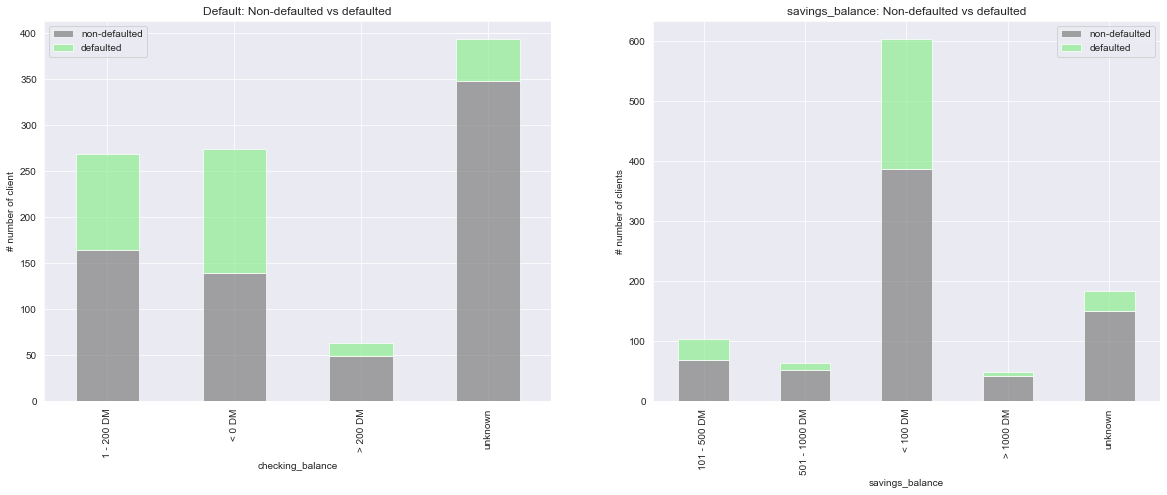

In [21]:
# Suplots of categorical features vs default
sns.set_style('darkgrid')
f, axes = plt.subplots(1,2, figsize = (20,7))

checking_balance = dataset.groupby(['checking_balance','default']).checking_balance.count().unstack()
p1 = checking_balance.plot(kind = 'bar', stacked = True, 
                   title = 'Default: Non-defaulted vs defaulted', 
                   color = ['grey','lightgreen'], alpha = .70, ax = axes[0])
p1.set_xlabel('checking_balance')
p1.set_ylabel('# number of client')
p1.legend(['non-defaulted','defaulted'])


savings_balance = dataset.groupby(['savings_balance','default']).savings_balance.count().unstack()
p2 = savings_balance.plot(kind = 'bar', stacked = True, 
                    title = 'savings_balance: Non-defaulted vs defaulted', 
                    color = ['grey','lightgreen'], alpha = .70, ax = axes[1])
p2.set_xlabel('savings_balance')
p2.set_ylabel('# number of clients')
p2.legend(['non-defaulted','defaulted'])

plt.show()

In [22]:
dataset['credit_history'].value_counts(dropna=False).to_frame()

,credit_history
repaid,530
critical,293
delayed,88
fully repaid this bank,49
fully repaid,40


In [23]:
dataset['purpose'].value_counts(dropna=False).to_frame()

,purpose
radio/tv,280
car (new),234
furniture,181
car (used),103
business,97
education,50
repairs,22
domestic appliances,12
others,12
retraining,9


In [24]:
dataset['savings_balance'].value_counts(dropna=False).to_frame()

,savings_balance
< 100 DM,603
unknown,183
101 - 500 DM,103
501 - 1000 DM,63
> 1000 DM,48


In [25]:
dataset['employment_length'].value_counts(dropna=False).to_frame()

,employment_length
1 - 4 yrs,339
> 7 yrs,253
4 - 7 yrs,174
0 - 1 yrs,172
unemployed,62


In [26]:
dataset['personal_status'].value_counts(dropna=False).to_frame()

,personal_status
single male,548
female,310
married male,92
divorced male,50


In [27]:
dataset['other_debtors'].value_counts(dropna=False).to_frame()

,other_debtors
none,907
guarantor,52
co-applicant,41


In [28]:
dataset['property'].value_counts(dropna=False).to_frame()

,property
other,332
real estate,282
building society savings,232
unknown/none,154


In [29]:
dataset['installment_plan'].value_counts(dropna=False).to_frame()

,installment_plan
none,814
bank,139
stores,47


In [30]:
dataset['telephone'].value_counts(dropna=False).to_frame()

,telephone
none,596
yes,404


In [31]:
dataset['housing'].value_counts(dropna=False).to_frame()

,housing
own,713
rent,179
for free,108


In [32]:
dataset['foreign_worker'].value_counts(dropna=False).to_frame()

,foreign_worker
yes,963
no,37


In [33]:
dataset['job'].value_counts(dropna=False).to_frame()

,job
skilled employee,630
unskilled resident,200
mangement self-employed,148
unemployed non-resident,22


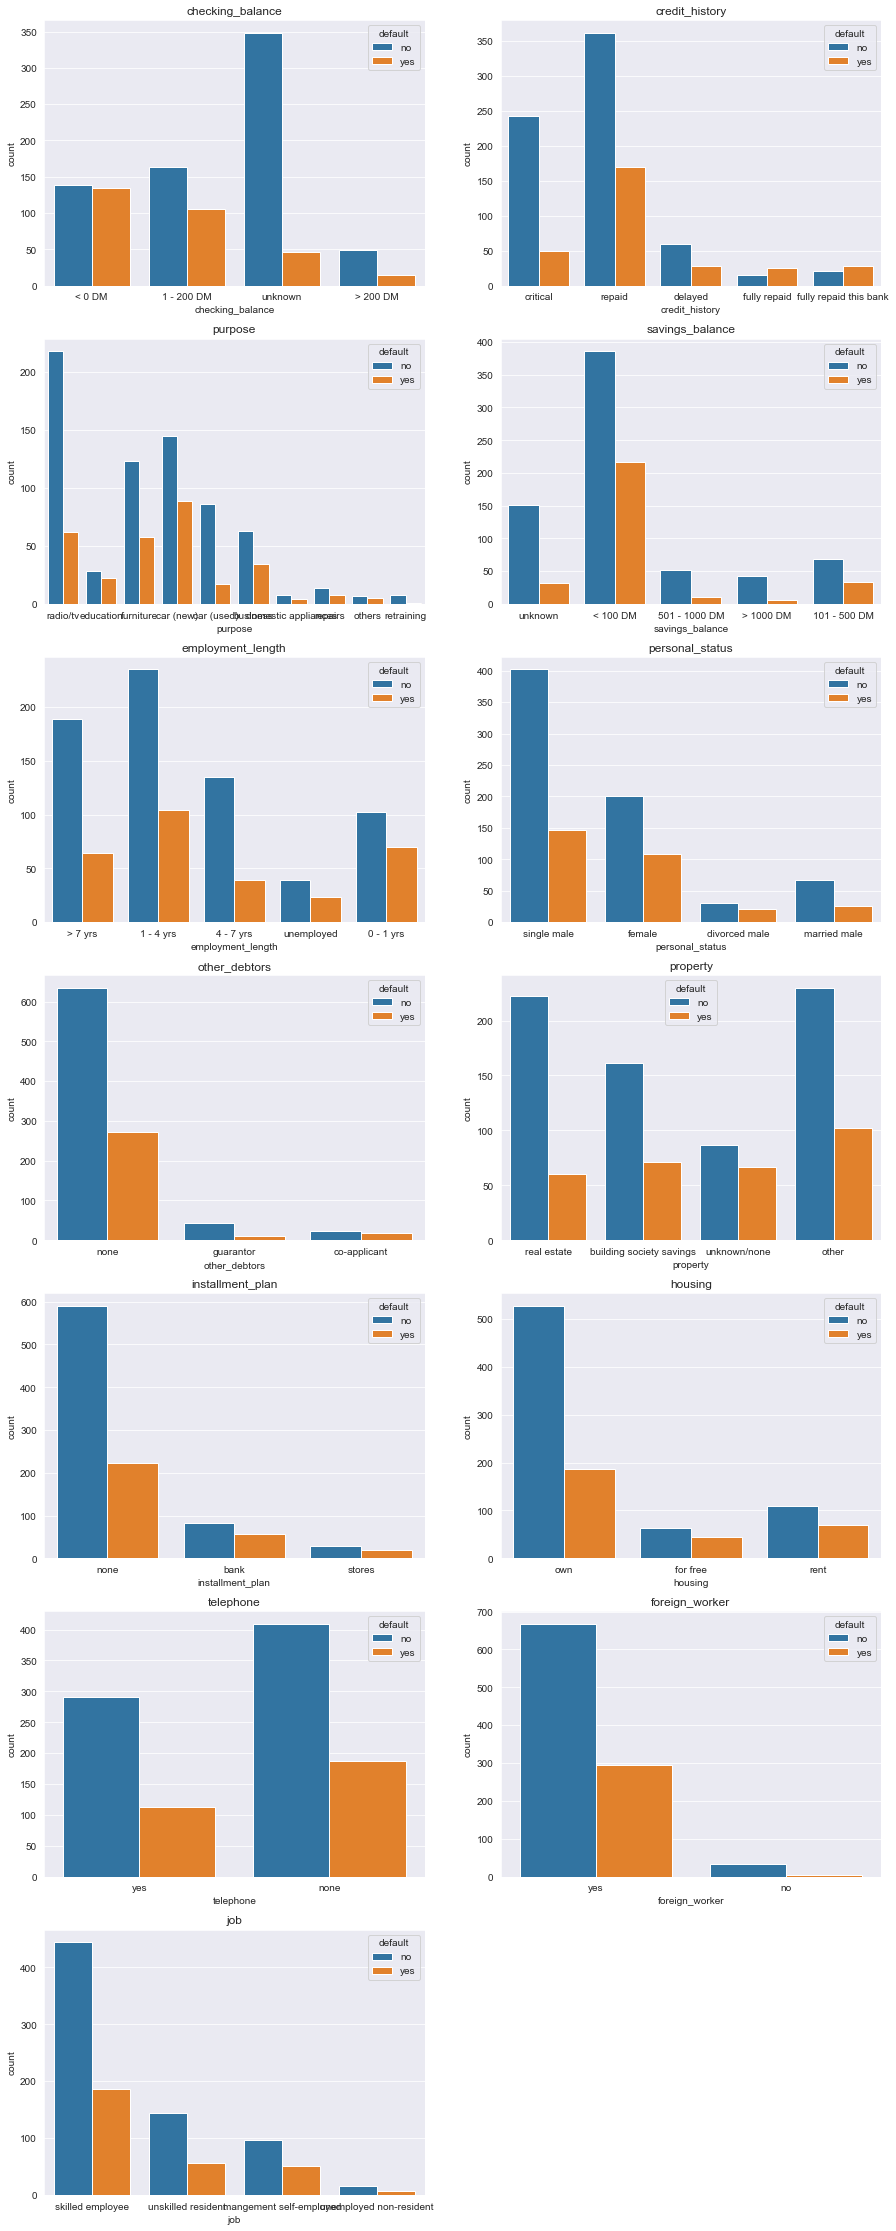

In [34]:
#note:
#generate subplot for all of them
a = 7 # number of rows
b = 2 # number of columns in a row
c = 1 # initialize plot counter

fig = plt.figure(figsize=(15,40))

for feature in cat_df.columns:
    plt.subplot(a, b, c)
    plt.title('{}'.format(feature))
    plt.xlabel(feature)
    sns.countplot(cat_df[feature], hue=dataset['default'])
    c = c +1
    
plt.show()    

Insigts about categorical features: The highest number of the loan clients are those which checking and saving balances are not mentioned and those with balance up to 100 DM. Majority of the clients have repaid regularly their loans, while around 1/3 of the clients are critical or delayed with the loan repayment. Those who haven't mentioned their balance, defaulted between 10-15%. As for the purpose of the loan, most of the clients took the loan to buy a new car or for "radio/tv" purposes. The clients that dominate in the loan structure are those having work experience between 1-4 years. Most of the clients are owning 'other' property (probably cars or something), while around 15% haven't told the type of property they own (majority of the clients which balance is unknown, own other property). Majority of the clients are single male (skilled workers), who own other property, most of them with purpose to buy a new car, radio/tv or furniture.
Interestingly, but majority of the clients are foreign workers (around 96%) and 1/3rd of them defaulted their loan repayments. As for the housing info, more than 80% of the clients own their housing or live for free (probably with parents). Neverthless, more than 70% of all defaulted loans belongs to these kind of clients.

In [35]:
pd.crosstab(dataset['checking_balance'],dataset['property'])

property,building society savings,other,real estate,unknown/none
checking_balance,,,,
1 - 200 DM,55,92,75,47
< 0 DM,80,74,70,50
> 200 DM,12,21,21,9
unknown,85,145,116,48


In [36]:
pd.crosstab(dataset['personal_status'],dataset['property'])

property,building society savings,other,real estate,unknown/none
personal_status,,,,
divorced male,10,18,17,5
female,79,109,89,33
married male,19,28,43,2
single male,124,177,133,114


In [37]:
pd.crosstab(dataset['personal_status'],dataset['purpose'])

purpose,business,car (new),car (used),domestic appliances,education,furniture,others,radio/tv,repairs,retraining
personal_status,,,,,,,,,,
divorced male,10,10,3,1,1,15,1,7,2,0
female,19,70,24,6,21,74,3,85,5,3
married male,9,20,6,1,1,7,0,42,3,3
single male,59,134,70,4,27,85,8,146,12,3


In [38]:
pd.crosstab(dataset['personal_status'],dataset['job'])

job,mangement self-employed,skilled employee,unemployed non-resident,unskilled resident
personal_status,,,,
divorced male,11,31,0,8
female,37,197,12,64
married male,6,62,2,22
single male,94,340,8,106


In [39]:
dataset['foreign_worker'].value_counts()

yes    963
no      37
Name: foreign_worker, dtype: int64

In [40]:
pd.crosstab(dataset['housing'],dataset['property'])

property,building society savings,other,real estate,unknown/none
housing,,,,
for free,2,1,1,104
own,184,271,226,32
rent,46,60,55,18


### **Numeric features**

In [41]:
num_columns

['months_loan_duration',
 'amount',
 'installment_rate',
 'residence_history',
 'age',
 'existing_credits',
 'default',
 'dependents']

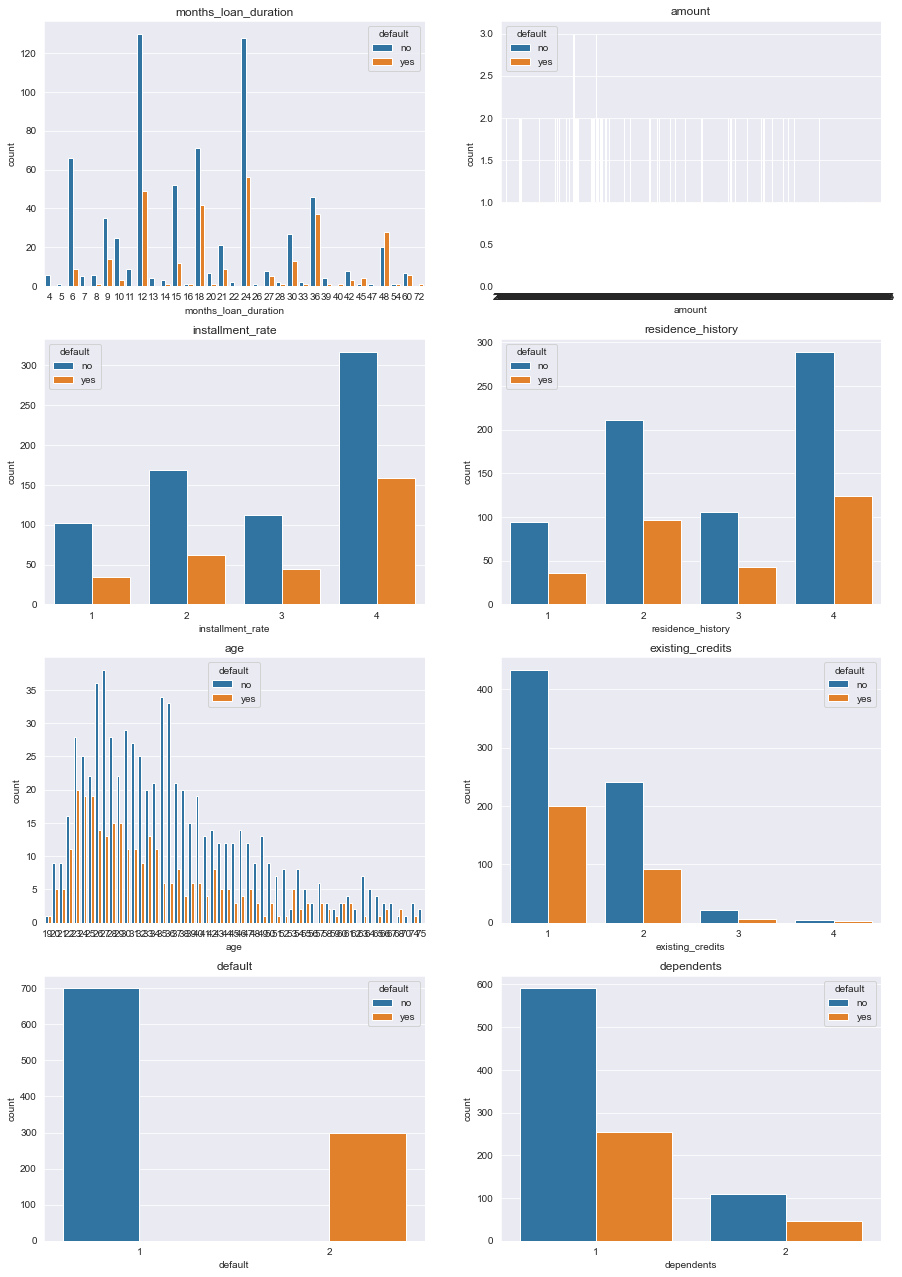

In [42]:
#note:
#generate subplot for all of them
a = 7 # number of rows
b = 2 # number of columns in a row
c = 1 # initialize plot counter

fig = plt.figure(figsize=(15,40))

for feature in num_df.columns:
    plt.subplot(a, b, c)
    plt.title('{}'.format(feature))
    plt.xlabel(feature)
    sns.countplot(num_df[feature], hue=dataset['default'])
    c = c +1
    
plt.show() 

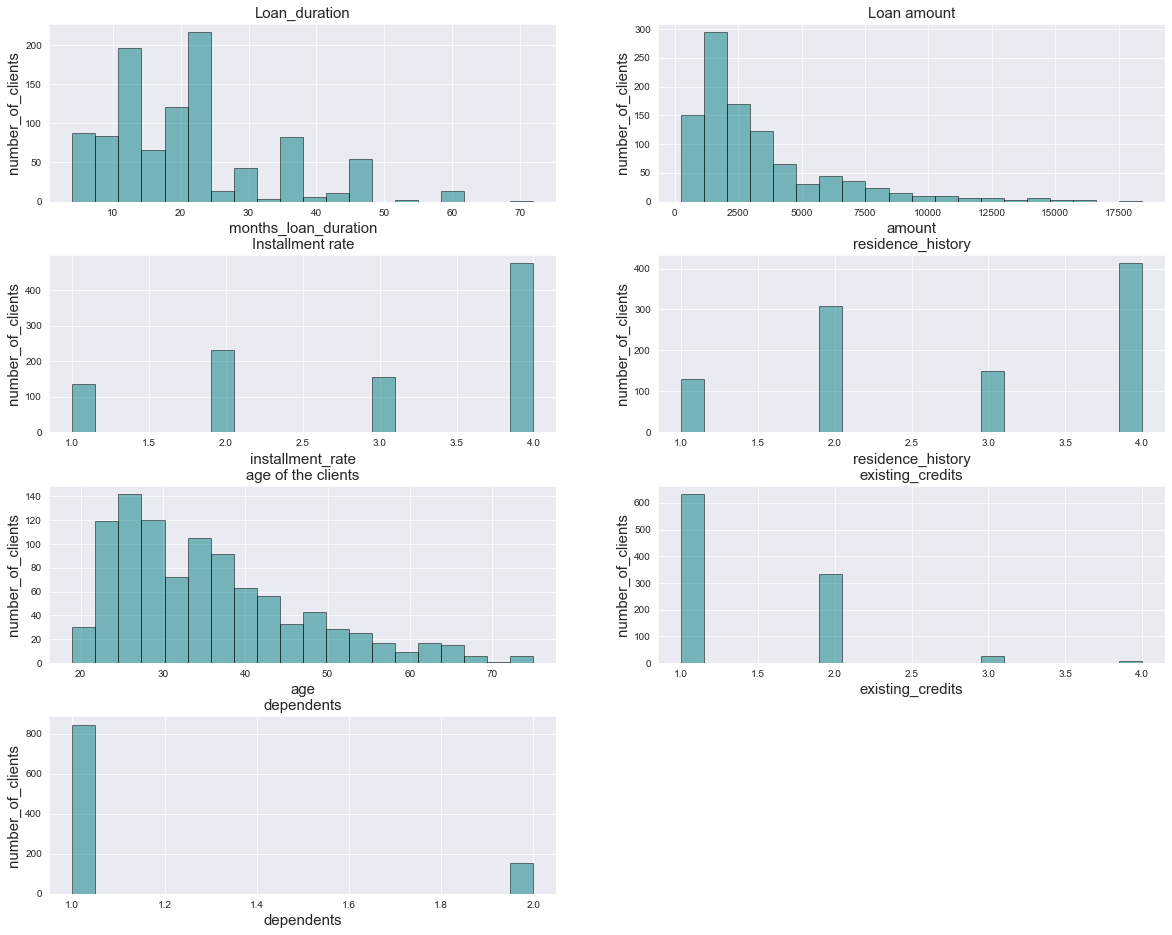

In [43]:
# Subplots of Numeric Features
sns.set_style('darkgrid')
fig = plt.figure(figsize = (20,16))
fig.subplots_adjust(hspace = .30)

ax1 = fig.add_subplot(421)
ax1.hist(dataset['months_loan_duration'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax1.set_xlabel('months_loan_duration', fontsize = 15)
ax1.set_ylabel('number_of_clients',fontsize = 15)
ax1.set_title('Loan_duration',fontsize = 15)

ax2 = fig.add_subplot(422)
ax2.hist(dataset['amount'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax2.set_xlabel('amount',fontsize = 15)
ax2.set_ylabel('number_of_clients',fontsize = 15)
ax2.set_title('Loan amount',fontsize = 15)

ax3 = fig.add_subplot(423)
ax3.hist(dataset['installment_rate'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax3.set_xlabel('installment_rate',fontsize = 15)
ax3.set_ylabel('number_of_clients',fontsize = 15)
ax3.set_title('Installment rate',fontsize = 15)

ax4 = fig.add_subplot(424)
ax4.hist(dataset['residence_history'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax4.set_xlabel('residence_history',fontsize = 15)
ax4.set_ylabel('number_of_clients',fontsize = 15)
ax4.set_title('residence_history',fontsize = 15)

ax5 = fig.add_subplot(425)
ax5.hist(dataset['age'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax5.set_xlabel('age',fontsize = 15)
ax5.set_ylabel('number_of_clients',fontsize = 15)
ax5.set_title('age of the clients',fontsize = 15)

ax6 = fig.add_subplot(426)
ax6.hist(dataset['existing_credits'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax6.set_xlabel('existing_credits',fontsize = 15)
ax6.set_ylabel('number_of_clients',fontsize = 15)
ax6.set_title('existing_credits',fontsize = 15)

ax7 = fig.add_subplot(427)
ax7.hist(dataset['dependents'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax7.set_xlabel('dependents',fontsize = 15)
ax7.set_ylabel('number_of_clients',fontsize = 15)
ax7.set_title('dependents',fontsize = 15)

plt.show()

Insigts about numeric features:Majority of the clients took the loan for up to 25 months  (the most defaulted are those who took for 1 or for 2 years) with each amount of up to 7500 DM (considering that the main purpose of the loan was for buying a new car or home elements, this seems well enough). Majority of the clients are between 20-40 years, seems logical, they are the most numerous defaulters. In terms of age, they are outliers, customers above 60 years, who defaulted loan repayment.

# 4.Bivariate analysis

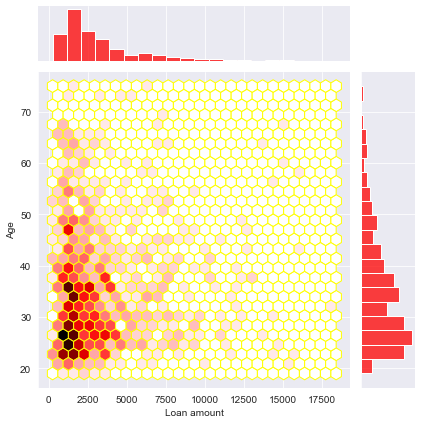

In [44]:
sns.jointplot(x=num_df['amount'], y=num_df['age'], kind='hex', marginal_kws=dict(bins=20, fill=True), color='red', edgecolor='yellow')
plt.xlabel('Loan amount')
plt.ylabel('Age')
plt.show()

Text(0.5, 0.98, '')

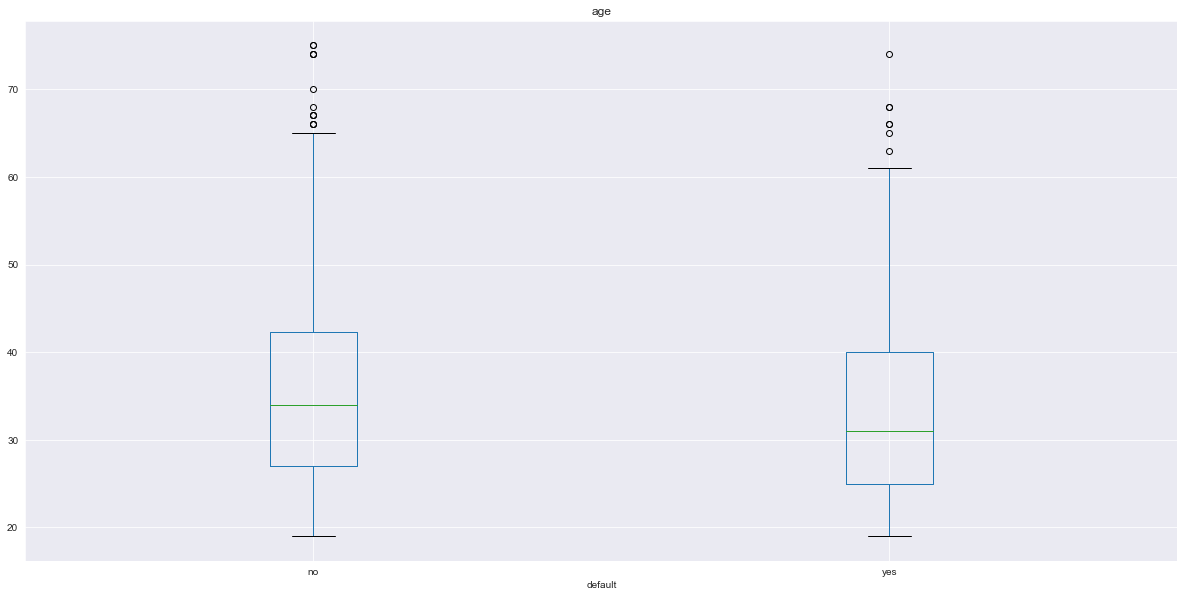

In [45]:
dataset.boxplot(column='age',by='default', figsize=(20,10))
plt.suptitle("")

In [46]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
months_loan_duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment_rate,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
residence_history,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
existing_credits,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
dependents,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


From he bivariate analysis of the numerical features and the target column it can be stated that the people who asked higher amount loan or loanger duration represent higher risk for the bank.

People in their twenties and thirties were dominant in the higher loan amount applications.

In [47]:
dataset.groupby(['default', 'credit_history']).size()

default  credit_history        
no       critical                  243
         delayed                    60
         fully repaid               15
         fully repaid this bank     21
         repaid                    361
yes      critical                   50
         delayed                    28
         fully repaid               25
         fully repaid this bank     28
         repaid                    169
dtype: int64

I will divide the age feature in bins so I can analyse distribution amoung age groups

In [48]:
pd.cut(dataset.age, bins=5).unique()

[(63.8, 75.0], (18.944, 30.2], (41.4, 52.6], (52.6, 63.8], (30.2, 41.4]]
Categories (5, interval[float64, right]): [(18.944, 30.2] < (30.2, 41.4] < (41.4, 52.6] < (52.6, 63.8] < (63.8, 75.0]]

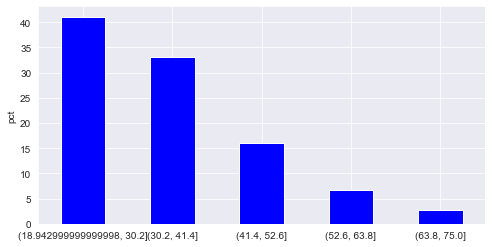

In [49]:
out = pd.cut(dataset.age, bins=5, include_lowest=True)
out_norm = out.value_counts(sort=False, normalize=True).mul(100)
ax=out_norm.plot.bar(rot=0, color='b', figsize=(8,4))
plt.ylabel('pct')
plt.show()

In [50]:
dataset.loc[(dataset['age']<=30), 'age_group']=1
dataset.loc[(dataset['age']>30)&(dataset['age']<=41), 'age_group']=2
dataset.loc[(dataset['age']>41)&(dataset['age']<=52), 'age_group']=3
dataset.loc[(dataset['age']>52)&(dataset['age']<=63), 'age_group']=4
dataset.loc[(dataset['age']>63), 'age_group']=5

In [51]:
dataset.groupby(['age', 'default']).agg({'months_loan_duration':'mean', 'amount':'mean'}).reset_index()

,age,default,months_loan_duration,amount
0,19,no,12.000000,983.000000
1,19,yes,9.000000,1980.000000
2,20,no,14.888889,2249.777778
3,20,yes,18.000000,1941.800000
4,21,no,25.333333,4584.444444
...,...,...,...,...
95,68,yes,12.000000,10828.500000
96,70,no,10.000000,7308.000000
97,74,no,11.666667,3091.000000
98,74,yes,9.000000,5129.000000


The analysis of the age_group feature and the loan duration and amount showed that in the third and fourth group i.e.41-63 years there is a pattern that shows that the people who asked for more money, more often were refused a loan.

### Removing NaN values

In [52]:
#replace 'unknown' with Nan =
dataset.replace({'unknown': np.nan}, inplace = True)

In [53]:
dataset.isna().sum()

checking_balance        394
months_loan_duration      0
credit_history            0
purpose                   0
amount                    0
savings_balance         183
employment_length         0
installment_rate          0
personal_status           0
other_debtors             0
residence_history         0
property                  0
age                       0
installment_plan          0
housing                   0
existing_credits          0
default                   0
dependents                0
telephone                 0
foreign_worker            0
job                       0
age_group                 0
dtype: int64

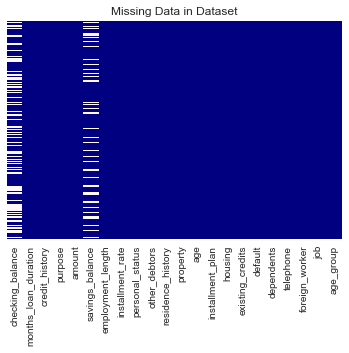

In [54]:
sns.heatmap(dataset.isnull(), yticklabels = False, cbar = False, cmap='gist_ncar')
plt.title('Missing Data in Dataset')
plt.show()

In [55]:
dataset['checking_balance'].isnull().sum()/len(dataset['checking_balance'])

0.394

In [56]:
dataset['savings_balance'].isnull().sum()/len(dataset['savings_balance'])

0.183

Almost 40% and 18% of the checking and saving balance respectively for the loan clients is missing.

# 5. Data Transformation

In [57]:
dataset["checking_balance"].unique()

array(['< 0 DM', '1 - 200 DM', nan, '> 200 DM'], dtype=object)

In [58]:
dataset["checking_balance_encoded"] = dataset["checking_balance"].map({np.nan:0, '< 0 DM':1,'1 - 200 DM':2, '> 200 DM':3})

In [59]:
dataset["savings_balance"].unique()

array([nan, '< 100 DM', '501 - 1000 DM', '> 1000 DM', '101 - 500 DM'],
      dtype=object)

In [60]:
dataset["savings_balance_encoded"] = dataset["savings_balance"].map({np.nan:0,
                                                                     '< 100 DM':1,
                                                                     '501 - 1000 DM':2,
                                                                     '> 1000 DM':3,
                                                                     '101 - 500 DM':4})

In [61]:
dataset['credit_history'].unique()

array(['critical', 'repaid', 'delayed', 'fully repaid',
       'fully repaid this bank'], dtype=object)

In [62]:
dataset.select_dtypes(include = 'O').columns

Index(['checking_balance', 'credit_history', 'purpose', 'savings_balance',
       'employment_length', 'personal_status', 'other_debtors', 'property',
       'installment_plan', 'housing', 'default', 'telephone', 'foreign_worker',
       'job'],
      dtype='object')

In [63]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le_df = dataset.copy()
for feature in le_df.select_dtypes(include = 'O').columns:
    le_df[feature] = le.fit_transform(le_df[feature])
    

In [64]:
le_df.columns

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_length', 'installment_rate',
       'personal_status', 'other_debtors', 'residence_history', 'property',
       'age', 'installment_plan', 'housing', 'existing_credits', 'default',
       'dependents', 'telephone', 'foreign_worker', 'job', 'age_group',
       'checking_balance_encoded', 'savings_balance_encoded'],
      dtype='object')

In [65]:
le_df

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,housing,existing_credits,default,dependents,telephone,foreign_worker,job,age_group,checking_balance_encoded,savings_balance_encoded
0,1,6,0,7,1169,4,3,4,3,2,...,1,2,0,1,1,1,1,5.0,1,0
1,0,48,4,7,5951,2,1,2,1,2,...,1,1,1,1,0,1,1,1.0,2,1
2,3,12,0,4,2096,2,2,2,3,2,...,1,1,0,2,0,1,3,3.0,0,1
3,1,42,4,5,7882,2,2,2,3,1,...,0,1,0,2,0,1,1,3.0,1,1
4,1,24,1,1,4870,2,1,3,3,2,...,0,2,1,2,0,1,1,4.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,12,4,5,1736,2,2,3,1,2,...,1,1,0,1,0,1,3,2.0,0,1
996,1,30,4,2,3857,2,1,4,0,2,...,1,1,0,1,1,1,0,2.0,1,1
997,3,12,4,7,804,2,3,4,3,2,...,1,1,0,1,0,1,1,2.0,0,1
998,1,45,4,7,1845,2,1,4,3,2,...,0,1,1,1,1,1,1,1.0,1,1


In [66]:
le_df.drop(columns = ['checking_balance', 'savings_balance'], inplace = True)

In [67]:
le_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
months_loan_duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_history,1000.0,2.435,1.800838,0.0,0.0,4.0,4.00,4.0
purpose,1000.0,3.870,2.720018,0.0,1.0,5.0,7.00,9.0
amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
employment_length,1000.0,1.694,1.198249,0.0,1.0,1.0,3.00,4.0
installment_rate,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
personal_status,1000.0,2.138,1.019802,0.0,1.0,3.0,3.00,3.0
other_debtors,1000.0,1.866,0.445244,0.0,2.0,2.0,2.00,2.0
residence_history,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
property,1000.0,1.358,1.001418,0.0,1.0,1.0,2.00,3.0


### Random Forest

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# For computing accuracy score
from sklearn.metrics import accuracy_score,f1_score,precision_score,precision_recall_curve,PrecisionRecallDisplay,auc
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix,RocCurveDisplay,roc_auc_score,roc_curve


In [100]:
y = le_df['default']
X = le_df.drop(columns = 'default')

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [102]:
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [103]:
y_pred = rf_clf.predict(X_test)

In [104]:
rf_score = accuracy_score(y_test, y_pred)

In [106]:
print('Accuracy',rf_score,'%')

Accuracy 0.77 %


In [108]:
# Accuracy
print('--'*40)
rf_accuracy = round(accuracy_score(y_test, y_pred)*100,2)
print('Accuracy',rf_accuracy,'%')

--------------------------------------------------------------------------------
Accuracy 77.0 %


In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       214
           1       0.64      0.44      0.52        86

    accuracy                           0.77       300
   macro avg       0.72      0.67      0.69       300
weighted avg       0.76      0.77      0.76       300



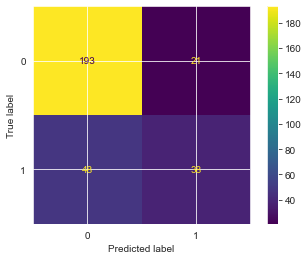

In [76]:
plot_confusion_matrix(rf_clf,
                     X_test,
                     y_test)

### Decision Tree

In [79]:
# Fit
# Import model
from sklearn.tree import DecisionTreeClassifier

# Create model object
dtree = DecisionTreeClassifier()

# Fit to training sets
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [80]:
# Predict
y_pred_dtree = dtree.predict(X_test)

In [81]:
# Score It
print('Decision Tree')
# Confusion Matrix
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_dtree))

# Classification Report
print('--'*40)
print('Classification Report',classification_report(y_test, y_pred_dtree))

# Accuracy
print('--'*40)
dtree_accuracy = round(accuracy_score(y_test, y_pred_dtree)*100,2)
print('Accuracy',dtree_accuracy,'%')

Decision Tree


Confusion Matrix
[[166  48]
 [ 44  42]]
--------------------------------------------------------------------------------
Classification Report               precision    recall  f1-score   support

           0       0.79      0.78      0.78       214
           1       0.47      0.49      0.48        86

    accuracy                           0.69       300
   macro avg       0.63      0.63      0.63       300
weighted avg       0.70      0.69      0.70       300

--------------------------------------------------------------------------------
Accuracy 69.33 %


### SUPPORT VECTOR CLASSIFIER

In [82]:
# Fit
# Import model
from sklearn.svm import SVC

# Instantiate the model
svc = SVC()

# Fit the model on training data
svc.fit(X_train, y_train)

SVC()

In [83]:
# Predict
y_pred_svc = svc.predict(X_test)

In [84]:
# Score It
from sklearn.metrics import classification_report, accuracy_score

print('Support Vector Classifier')
print('\n')
# Confusion matrix
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_svc))
print('--'*40)

# Classification report
print('Classification Report')
print(classification_report(y_test, y_pred_svc))

# Accuracy
print('--'*40)
svc_accuracy = round(accuracy_score(y_test, y_pred_svc)*100,2)
print('Accuracy', svc_accuracy,'%')

Support Vector Classifier


Confusion Matrix
[[210   4]
 [ 81   5]]
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.72      0.98      0.83       214
           1       0.56      0.06      0.11        86

    accuracy                           0.72       300
   macro avg       0.64      0.52      0.47       300
weighted avg       0.67      0.72      0.62       300

--------------------------------------------------------------------------------
Accuracy 71.67 %


### KERNEL SUPPORT VECTOR CLASSIFIER

In [86]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_sc = sc.fit_transform(X_train)
x_test_sc = sc.transform(X_test)

In [87]:
# Fit
# Import model
from sklearn.svm import SVC

# Instantiate model object
ksvc= SVC(kernel = 'rbf', random_state = 0)

# Fit on training data
ksvc.fit(x_train_sc, y_train)

SVC(random_state=0)

In [88]:
# Predict
y_pred_ksvc = ksvc.predict(x_test_sc)

In [89]:
# Score it
print('Kernel SVC')
# Confusion Matrix
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_ksvc))

# Classification Report
print('--'*40)
print('Classification Report')
print(classification_report(y_test, y_pred_ksvc))

# Accuracy
print('--'*40)
ksvc_accuracy = round(accuracy_score(y_test,y_pred_ksvc)*100,1)
print('Accuracy',ksvc_accuracy,'%')

Kernel SVC


Confusion Matrix
[[207   7]
 [ 71  15]]
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.74      0.97      0.84       214
           1       0.68      0.17      0.28        86

    accuracy                           0.74       300
   macro avg       0.71      0.57      0.56       300
weighted avg       0.73      0.74      0.68       300

--------------------------------------------------------------------------------
Accuracy 74.0 %


### K-NEAREST NEIGHBORS

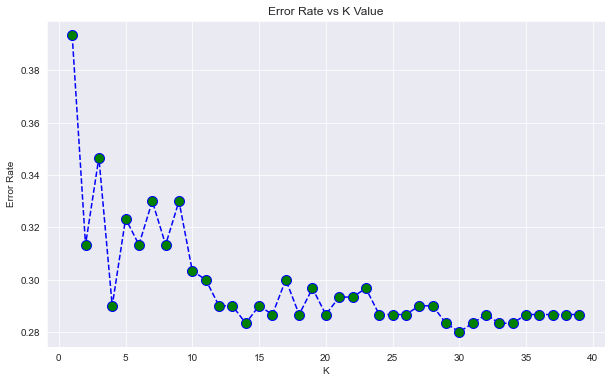

In [94]:
from sklearn.neighbors import KNeighborsClassifier
# Function
error_rate = []

for i in range (1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

# Plot error rate
plt.figure(figsize = (10,6))
plt.plot(range(1,40), error_rate, color = 'blue', linestyle = '--', marker = 'o', 
        markerfacecolor = 'green', markersize = 10)

plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [95]:
# Fit KNN
# Create model object
knn = KNeighborsClassifier(n_neighbors = 13)

# Fit new KNN on training data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [96]:
# Predict new KNN
y_pred_knn_op = knn.predict(X_test)

In [97]:
# Score it with new KNN
print('K-Nearest Neighbors(KNN)')
print('k = 13')

# Confusion Matrix
print('\n')
print(confusion_matrix(y_test, y_pred_knn_op))

# Classification Report
print('--'*40)
print('Classfication Report',classification_report(y_test, y_pred_knn_op))

# Accuracy
print('--'*40)
knn_op_accuracy =round(accuracy_score(y_test, y_pred_knn_op)*100,2)
print('Accuracy',knn_op_accuracy,'%')

K-Nearest Neighbors(KNN)
k = 13


[[198  16]
 [ 71  15]]
--------------------------------------------------------------------------------
Classfication Report               precision    recall  f1-score   support

           0       0.74      0.93      0.82       214
           1       0.48      0.17      0.26        86

    accuracy                           0.71       300
   macro avg       0.61      0.55      0.54       300
weighted avg       0.66      0.71      0.66       300

--------------------------------------------------------------------------------
Accuracy 71.0 %


In [109]:
models = pd.DataFrame({
     'Model': [ 'Random Forest','Decision Tree', 'SVM', 'Kernel SVC', 
               'K-Nearest Neighbors'],
    'Score': [rf_accuracy, dtree_accuracy, 
               svc_accuracy, ksvc_accuracy, knn_op_accuracy]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Random Forest,77.00
3,Kernel SVC,74.00
2,SVM,71.67
4,K-Nearest Neighbors,71.00
1,Decision Tree,69.33


The best accuracy score I got with Random forest algorithm. 
P.S. Sorry for not providing the comments in the ML modeling, I am too tired of the preprocessing analysis I put all my energy and my cat is calling me to go to bed :)